In [1]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

Using TensorFlow backend.


In [2]:
# generate regression dataset
X, Y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

In [3]:
# standardize dataset
X = StandardScaler().fit_transform(X)
Y = StandardScaler().fit_transform(Y.reshape(len(Y),1))[:,0]

In [4]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainY, testY = Y[:n_train], Y[n_train:]

In [5]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])

W1214 09:13:16.139703 15172 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1214 09:13:16.164634 15172 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1214 09:13:16.166628 15172 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1214 09:13:16.221479 15172 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [6]:
# fit model
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, verbose=0)

W1214 09:13:16.358116 15172 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1021: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1214 09:13:16.379100 15172 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1008: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



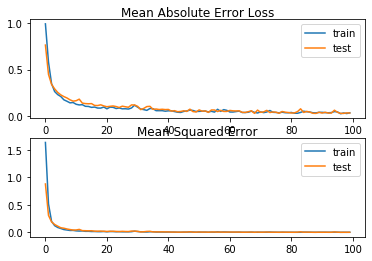

In [7]:
# evaluate the model
_, train_mse = model.evaluate(trainX, trainY, verbose=0)
_, test_mse = model.evaluate(testX, testY, verbose=0)

# plot loss during training
pyplot.subplot(211)
pyplot.title('Mean Absolute Error Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error', pad=-20)
pyplot.plot(history.history['mean_squared_error'], label='train')
pyplot.plot(history.history['val_mean_squared_error'], label='test')
pyplot.legend()
pyplot.show()